In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [38]:
def load_svhn_format_2(path):
    """ Load SVHN dataset in Format 2 """
    data = scipy.io.loadmat(path)
    images = np.array(data['X'])
    images = np.moveaxis(images, -1, 0)
    labels = data['y']
    labels[labels == 10] = 0  # replace label 10 with 0
    return images, labels

## Preprocessing Techiques

In [23]:
def apply_grayscale(images):
    """ Convert images to grayscale """
    return np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in images])

def apply_edge_detection(images):
    """ Apply edge detection to images """
    return np.array([cv2.Canny(img, 100, 200) for img in images])

def apply_random_erasing(images, probability=0.5):
    """ Randomly erase parts of the images """
    erased_images = []
    for img in images:
        if random.uniform(0, 1) < probability:
            x = random.randint(0, img.shape[1])
            y = random.randint(0, img.shape[0])
            width = random.randint(10, 20)
            height = random.randint(10, 20)
            img[y:y+height, x:x+width] = 0
        erased_images.append(img)
    return np.array(erased_images)

def normalize_images(images):
    """ Normalize image pixel values """
    return images / 255.0

In [39]:
def plot_images(images, labels):
    """ Plot images with labels """
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title("Label: {}".format(np.argmax(labels[i])))
        plt.axis('off')
    plt.show()

In [40]:
# Load data
train_data, train_labels = load_svhn_format_2('/Users/shantambhuraria/Desktop/data_605/SkyViewSVHN/train_32x32.mat')
test_data, test_labels = load_svhn_format_2('/Users/shantambhuraria/Desktop/data_605/SkyViewSVHN/train_32x32.mat')


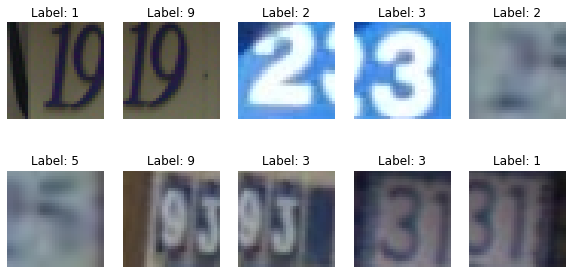

In [41]:
# Preprocess data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Visualize some training data
plot_images(train_data, train_labels)

### Model 1 : CNN 

In [46]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)




Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [43]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

2290/2290 [==============================] - 5s 2ms/step - loss: 0.2977 - accuracy: 0.9128
Test accuracy: 0.9127864837646484


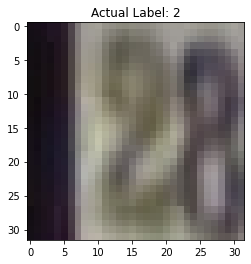

1/1 [==============================] - 0s 10ms/step
Predicted Label: 2


In [52]:
# Function to visualize prediction
def visualize_prediction(index):
    plt.imshow(test_data[index])
    plt.title("Actual Label: {}".format(np.argmax(test_labels[index])))
    plt.show()

    predicted_label = model.predict(test_data[index:index+1])
    print("Predicted Label: {}".format(np.argmax(predicted_label)))

# Visualize prediction for an example image from the test set
visualize_prediction(12)

1/1 [==============================] - 0s 10ms/step


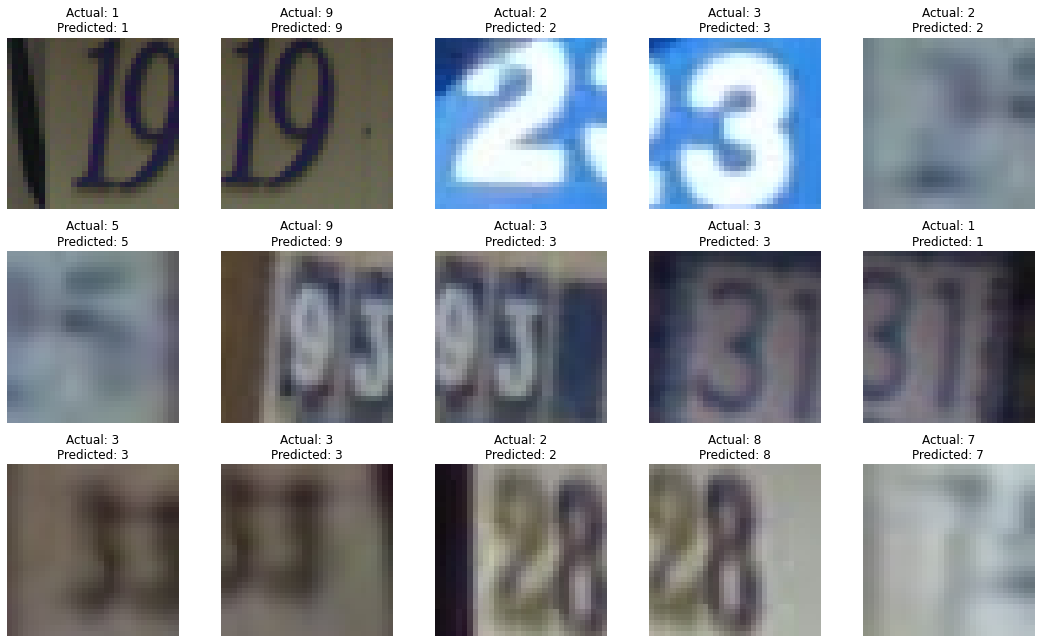

In [45]:
def visualize_multiple_predictions(start_index, num_images):
    """ Visualize multiple predictions from the model """
    plt.figure(figsize=(15, (num_images // 5 + 1) * 3))

    for i in range(num_images):
        img_index = start_index + i
        ax = plt.subplot(num_images // 5 + 1, 5, i + 1)
        plt.imshow(test_data[img_index])
        plt.axis('off')

        actual_label = np.argmax(test_labels[img_index])
        predicted_label = np.argmax(model.predict(test_data[img_index:img_index+1]))

        ax.set_title(f'Actual: {actual_label}\nPredicted: {predicted_label}')

    plt.tight_layout()
    plt.show()

# Visualize predictions for 15 images from the test set, starting from a specific index
visualize_multiple_predictions(start_index=0, num_images=15)


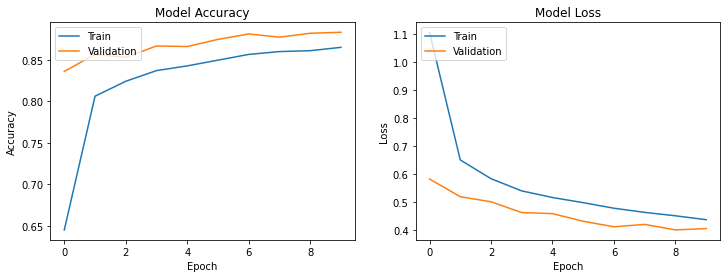

In [47]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Model 2 : Generative Adversarial Networks (GANs)